In [3]:
import source.pipelineprocesser as plp
from source.model import option1, option2


print(option2())

start -> definite_regression_imputation_0
definite_regression_imputation_0 -> marginal_screening_1
marginal_screening_1 -> extract_1
extract_1 -> dffits_0
dffits_0 -> remove_1
remove_1 -> stepwise_feature_selection_1
remove_1 -> lasso_1
stepwise_feature_selection_1 -> intersection_0
lasso_1 -> intersection_0
intersection_0 -> end


In [3]:
from source.pipelineprocesser import (
make_dataset, mean_value_imputation, cook_distance, remove_outliers, marginal_screening, extract_features, stepwise_feature_selection, lasso, union, make_pipeline,
definite_regression_imputation, dffits, intersection, make_pipelines
)
import numpy as np

def option1():
    X, y = make_dataset()
    y = mean_value_imputation(X, y)

    O = cook_distance(X, y, 3.0, {1.0, 2.0, 3.0})
    X, y = remove_outliers(X, y, O)

    M = marginal_screening(X, y, 5, {5, 7, 9})
    X = extract_features(X, M)

    M1 = stepwise_feature_selection(X, y, 3, {2, 3, 4})
    M2 = lasso(X, y, 0.08, {0.04, 0.08, 0.12})
    M = union(M1, M2)
    return make_pipeline(output=M)

def option2():
    X, y = make_dataset()
    y = definite_regression_imputation(X, y)

    M = marginal_screening(X, y, 5, {3, 5})
    X = extract_features(X, M)

    O = dffits(X, y, 3.0, {2.0, 3.0})
    X, y = remove_outliers(X, y, O)

    M1 = stepwise_feature_selection(X, y, 3, {2, 3})
    M2 = lasso(X, y, 0.08, {0.08, 0.12})
    M = intersection(M1, M2)
    return make_pipeline(output=M)

rng = np.random.default_rng()
n, p = 200, 20
pl = option1()
X = rng.normal(size=(n, p))
y = rng.normal(size=n)

pl.tune(X, y, n_iter=81, cv=5)
print(pl.inference(X, y, 1.0))


([16, 5, 7, 9, 12], [0.23106412464563586, 0.5822191629376969, 0.5673553929352066, 0.20552831382490833, 0.09263179644744723])


In [18]:
mpl = make_pipelines(option1(), option2())
mpl.tune(X, y, n_iters=16, cv=5)
print(mpl.inference(X, y, 1.0, test_index=0))


(1, 0.7024480152386989)


In [21]:
print(mpl.best_index)
print(mpl.pipelines[mpl.best_index].best_candidate)

1
{'marginal_screening_18': 5, 'dffits_2': 2.0, 'stepwise_feature_selection_18': 2, 'lasso_18': 0.08}


In [13]:
import pickle

with open('results_cv_op1and2/200_20_0.0_0.pkl', 'rb') as f:
    results = pickle.load(f)

print(results[7])

print(len(results))

print()

SelectiveInferenceResult(stat=-1.8942838621897045, alpha=0.05, p_value=0.09642759507142629, inf_p=0.09642759507142629, sup_p=0.09739472078796485, reject_or_not=False, truncated_intervals=[[-1.9002783611380913, -1.8411677908652635]], search_count=369, detect_count=3, selected_model=None, mappings=None)
100



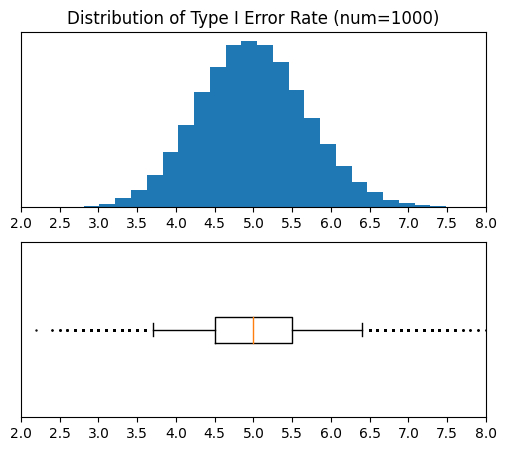

In [14]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()
values = []
for _ in range(100000):
    v = np.mean(rng.uniform(size=int(num := 1e3)) < 0.05)
    values.append(v * 100)

# plt.boxplot(values)
# plt.show()

# plt.hist(values, bins=100)
# plt.show()

fig, ax = plt.subplots(2, figsize=(6, 5))
plt.title(f'Distribution of Type I Error Rate (num={int(num)})', y=2.2)

ax[0].hist(values, bins=30)
ax[1].boxplot(values, vert=False, whis=(2.5, 97.5), flierprops=dict(ms=0.7))

ax[0].set_yticks([])
ax[1].set_yticks([])
ax[0].set_xlim(2, 8)
ax[1].set_xlim(2, 8)
ax[0].set_xticks(np.arange(2, 8.5, 0.5))
ax[1].set_xticks(np.arange(2, 8.5, 0.5))


plt.savefig(f'num1e{int(np.log10(num))}.pdf', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

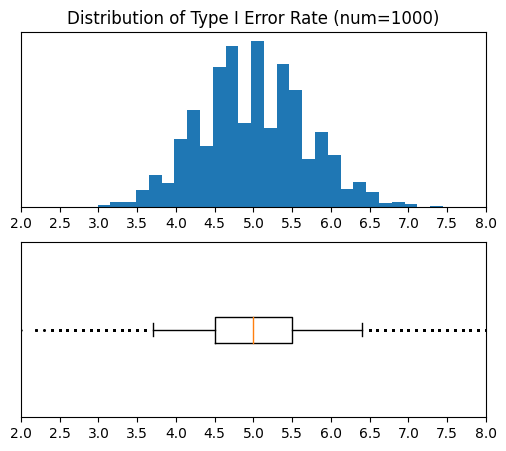

In [47]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()
values = rng.binomial(int(num := 1e3), 0.05, size=1000000) * 100 / num

# plt.boxplot(values)
# plt.show()

# plt.hist(values, bins=100)
# plt.show()

fig, ax = plt.subplots(2, figsize=(6, 5))
plt.title(f'Distribution of Type I Error Rate (num={int(num)})', y=2.2)

ax[0].hist(values, bins=40)
ax[1].boxplot(values, vert=False, whis=(2.5, 97.5), flierprops=dict(ms=0.7))

ax[0].set_yticks([])
ax[1].set_yticks([])
ax[0].set_xlim(2, 8)
ax[1].set_xlim(2, 8)
ax[0].set_xticks(np.arange(2, 8.5, 0.5))
ax[1].set_xticks(np.arange(2, 8.5, 0.5))


plt.savefig(f'num1e{int(np.log10(num))}.pdf', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()